In [1]:
import pandas as pd
 
# Extract data from a CSV (you can replace with your dataset)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)
 
# Preview the data
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [2]:
# Check for null values
print(df.isnull().sum())
 
# Feature Engineering: Add Tip % Column
df['tip_pct'] = df['tip'] / df['total_bill']
 
# Convert categorical to category type
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['day'] = df['day'].astype('category')
df['time'] = df['time'].astype('category')

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [3]:
# Summary
print(df.describe())
 

# Load into cleaned DataFrame (could be into a DB too)
cleaned_df = df.copy()
 
# Save to new CSV if needed
cleaned_df.to_csv("cleaned_tips_data.csv", index=False)
 

import seaborn as sns
import matplotlib.pyplot as plt
 
# Set theme
sns.set(style="whitegrid")

       total_bill         tip        size     tip_pct
count  244.000000  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672    0.160803
std      8.902412    1.383638    0.951100    0.061072
min      3.070000    1.000000    1.000000    0.035638
25%     13.347500    2.000000    2.000000    0.129127
50%     17.795000    2.900000    2.000000    0.154770
75%     24.127500    3.562500    3.000000    0.191475
max     50.810000   10.000000    6.000000    0.710345


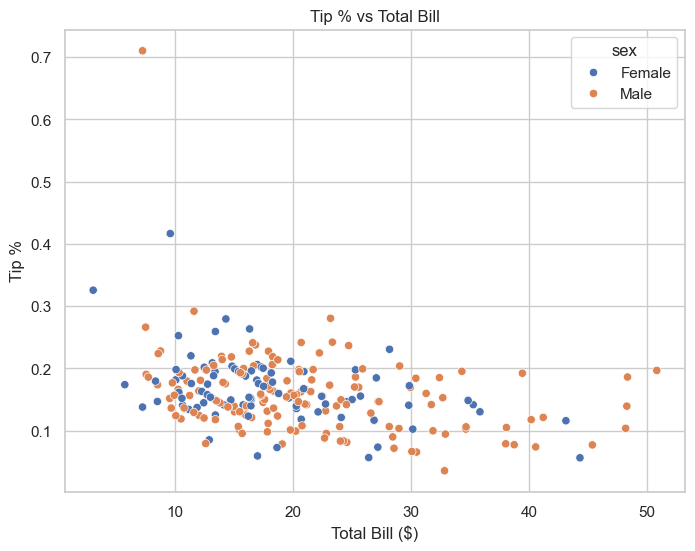

In [4]:
# 1. Tip percentage vs. total bill
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df, x="total_bill", y="tip_pct", hue="sex")
plt.title("Tip % vs Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip %")
plt.show()

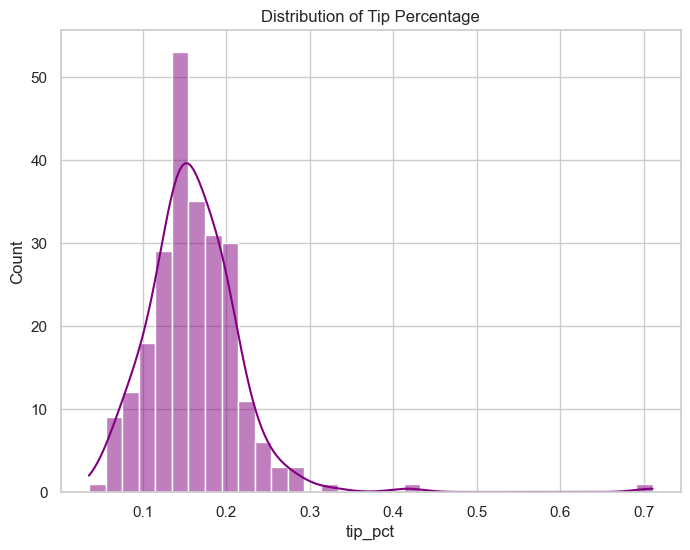

In [5]:
# 2. Distribution of Tip %
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df["tip_pct"], kde=True, color="purple")
plt.title("Distribution of Tip Percentage")
plt.show()

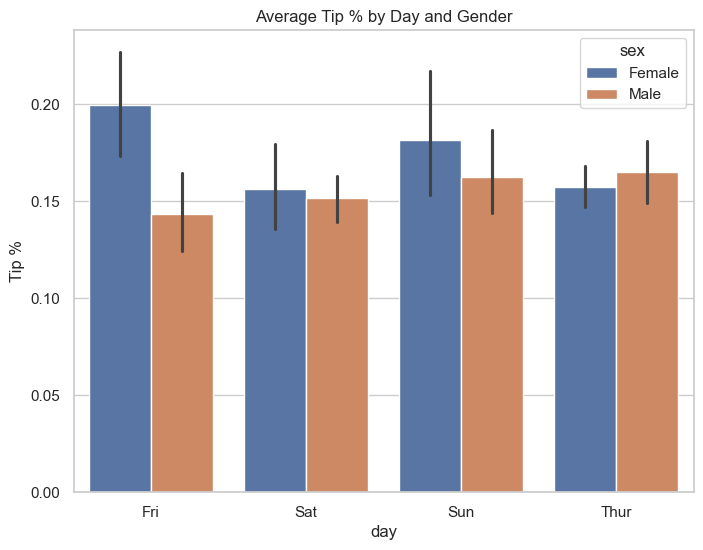

In [6]:
# 3. Average Tip % by Day
plt.figure(figsize=(8, 6))
sns.barplot(data=cleaned_df, x="day", y="tip_pct", hue="sex")
plt.title("Average Tip % by Day and Gender")
plt.ylabel("Tip %")
plt.show()

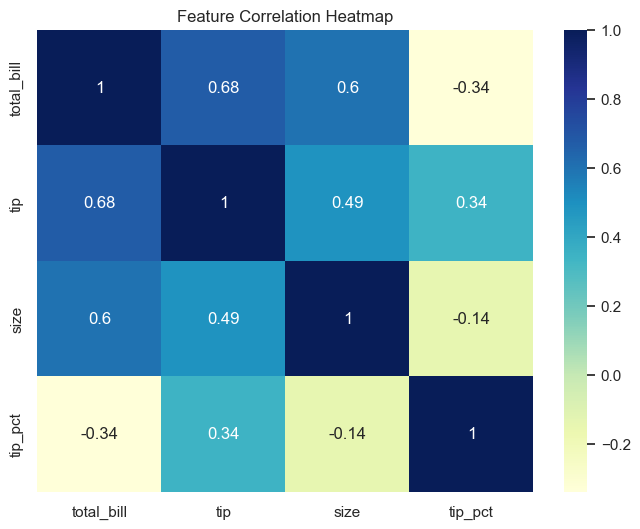

In [7]:
# 4. Heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()